In [1]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

## Get example image and rgb colors

(6368, 9560, 3)


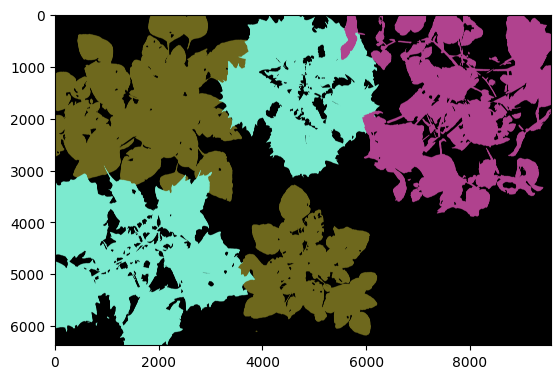

In [2]:
imgp = "/home/mkutuga/SemiF-SyntheticPipeline/data/projects/very_big/results/masks/ef02a53251dd43eaaf91b99c48a4600d.png"
img = cv2.imread(str(imgp),1) # 3-channel by default
plt.imshow(img)
plt.show()

### Get unique palette RGB colors

In [4]:
img = np.array(img)
palette = np.unique(img.reshape(-1, img.shape[2]), axis=0)
print(palette)

[[  0   0   0]
 [110 104  29]
 [124 234 207]
 [176  66 142]]


## Turn pink to green

In [23]:
# Remove last pink color
new_palette = palette[:3]
new_palette = np.array(new_palette).transpose()

# Create mask
# all(2) force all channels to be equal, Test whether all array elements along a given axis evaluate to True.
# any(-1) matches any color. Test whether any array element along a given axis evaluates to True.
mask = (img[:,:,:, None] == new_palette).all(2).any(-1)


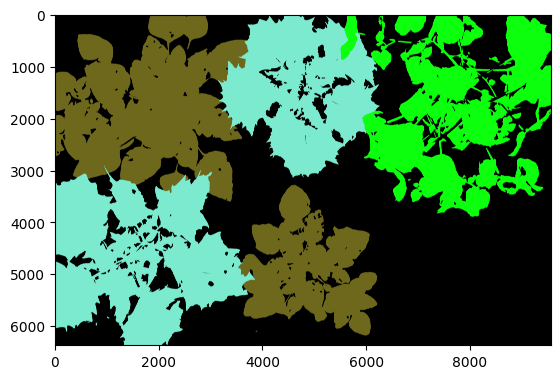

In [24]:
# replacement color
rep_color = np.array([12,255,12])

# np.where to remap colors
res = np.where(mask[:,:,None], img, rep_color[None,None,:])

# Show results
plt.imshow(res)
plt.show()